In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
def apply_kernel_to_image(im, K):
    rows,cols = im.shape
    im_new = np.zeros((rows,cols))
    ofx = int(np.floor(K.shape[0])/2)
    ofy = int(np.floor(K.shape[1])/2)
    for i in range(ofx,rows-ofx):
        for j in range(ofy,cols-ofy):
            im_new[i,j] = np.sum(K*im[i-ofx:i+ofx+1,j-ofy:j+ofy+1])
    return im_new

def make_mean_kernel(s):
    return np.ones((s,s))/np.power(s,2)

def make_gaussian_kernel(s, sigma):
    k = int((s-1)/2)
    print(k)
    I = np.arange(1,2*k+2).reshape((s,1))*np.ones((1,s))
    J = I.T
    K = np.exp(-(np.power(I-(k+1),2)+np.power(J-(k+1),2))/(2*sigma*sigma))/(2*np.pi*sigma*sigma)
    return K
    
def operator_normalize(im):
    im = np.uint8(256*(im-im.min())/(im.max()-im.min()))
    return im

def operator_umbral(im, umbral):
    im[im<umbral] = 0
    im[im>=umbral] = 255
    return im

def operator_rearrange(im, low, high):
    im[im<low] = low
    im[im>high] = low
    return operator_normalize(im)


In [ ]:
im = cv2.imread('messi5.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

K0 = make_mean_kernel(3)
K1 = make_mean_kernel(5)
K2 = make_gaussian_kernel(3,0.9)
K3 = make_gaussian_kernel(5,1.4)

im_mean3 = apply_kernel_to_image(im, K0)
im_mean5 = apply_kernel_to_image(im, K1)
im_gauss3 = apply_kernel_to_image(im, K2)
im_gauss5 = apply_kernel_to_image(im, K3)

plt.figure(1,figsize=(20,20))
plt.subplot(321),plt.imshow(im, cmap='gray', interpolation='none')
plt.subplot(323),plt.imshow(im_mean3, cmap='gray', interpolation='none')
plt.subplot(324),plt.imshow(im_mean5, cmap='gray', interpolation='none')
plt.subplot(325),plt.imshow(im_gauss3, cmap='gray', interpolation='none')
plt.subplot(326),plt.imshow(im_gauss5, cmap='gray', interpolation='none')
plt.show()


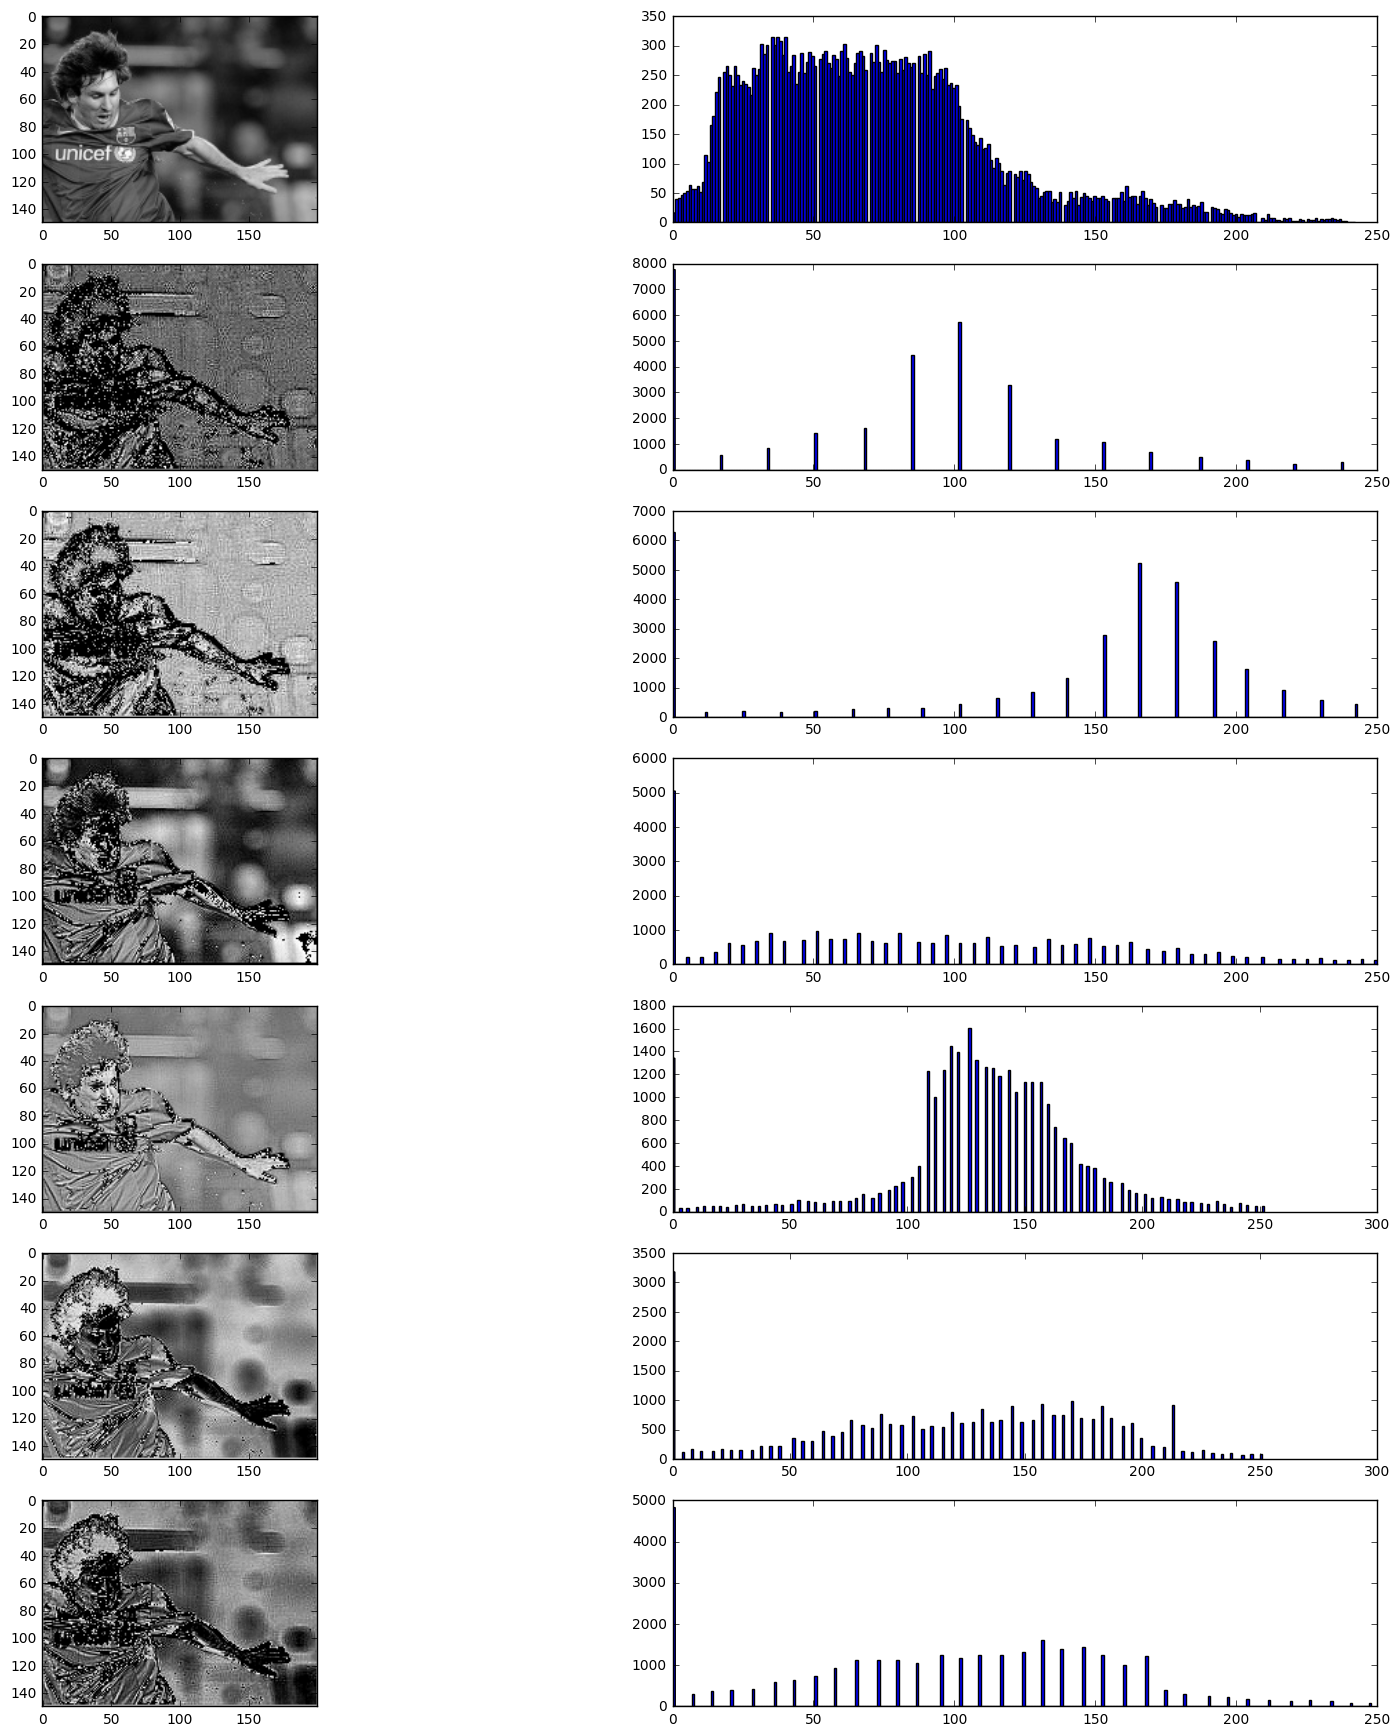

In [13]:
im = cv2.imread('messi5.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im = im[50:200,200:400]

K = []
K.append( -np.array([[0,1,0],[1,-4,1],[0,1,0]])) # laplacian 1
K.append( -np.array([[1,1,1],[1,-8,1],[1,1,1]])) # laplacian 
K.append( -np.array([[0,1,0],[1,-5,1],[0,1,0]])) # laplacian 1
K.append( -np.array([[1,1,1],[1,-9,1],[1,1,1]])) # laplacian 2
K.append(  np.array([[0,1,0],[1,-5,1],[0,1,0]])) # laplacian 1
K.append(  np.array([[1,1,1],[1,-9,1],[1,1,1]])) # laplacian 2

# par = (li,hi,cri)
pars = [(110,125,0),(110,130,0),(75,125,0),(75,150,0),(130,190,0),(125,160,0)]
images = []
for Ki,par in zip(K,pars):
    li,hi,cri = par
    images.append( apply_kernel_to_image(im,Ki) )
    images[-1] = operator_normalize(images[-1])
    images[-1] = operator_rearrange(images[-1], li, hi)
#
#im_filtered = operator_umbral(im_filtered,90)

plt.figure(1,figsize=(20,25))
plt.subplot(8,2,1),plt.imshow(im, cmap='gray')
plt.subplot(8,2,2),plt.hist(im.ravel(), 256)
for i,image in enumerate(images):
    plt.subplot(8,2,2*i+3),plt.imshow(image, cmap='gray')
    plt.subplot(8,2,2*i+4),plt.hist(image.ravel(), 256)
plt.show()
